### Reference mapping on COVID-19 dataset 
Test as scGPT. 
We will use COVID-19 dataset to demonstrate the zero-shot reference mapping. You can download the processed reference and query datasets from https://drive.google.com/drive/folders/1jSPoPunGQOmd71vDsK0FS7UvmDhGdhQS. 
The COVID-19 dataset is derived from the work by Lotfollahi et al, which contains 18 distinct batches and diverse samples from lung tissues. The reference dataset consists of 15,997 cells and the query dataset contains 4,003 cells. 

In [12]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cellama import lm_cell_reference_celltyping,lm_cell_embed , lm_cell_integrated_embed,lm_cell_reference_celltyping_nn,lm_cell_reference_celltyping_xgb

In [13]:
adata = sc.read_h5ad('./COVID19data/batch_covid_subsampled_train.h5ad')
test_adata = sc.read_h5ad('./COVID19data/batch_covid_subsampled_test.h5ad')


In [14]:
adata

AnnData object with n_obs × n_vars = 15997 × 1200
    obs: 'age', 'age_range', 'anatomical_region', 'anatomical_region_detailed', 'batch', 'dataset', 'disease', 'donor', 'ethnicity', 'ethnicity_mixed', 'last_author/PI', 'lung_vs_nasal', 'original_celltype_ann', 'pack_years', 'sample', 'sample_alias', 'sample_type', 'sampling_method', 'sex', 'smoking', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', 'subject_type', 'study', 'study2', 'celltype', 'condition', 'cellnames', 'cluster', 'stage', 'ID', 'sample_new', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'tissue', 'str_batch', 'batch_id'
    var: 'n_cells-0', 'n_cells-0-0-1', 'gene_ids-1-0-1', 'feature_types-1-0-1', 'genome-1-0-1', 'gene_name', 'n_counts', 'highly_variable', 'highly_variable_rank',

In [15]:
adata.obs[['sample','disease','condition','sample_new','celltype']]

,sample,disease,condition,sample_new,celltype
483188-0-0-1,AdultBladder,nan,control,nan,Monocytes
P2_1_GGTGAAGAGAGAACAG_Krasnow-0-0,distal 2,nan,control,nan,AT2
513429-0-0-1,AdultPeripheralBlood,nan,control,nan,T cell
CCTACCACACTCTGTC-1-HCATisStab7659969_Meyer-1-0,368C_12h,nan,control,nan,CD4+ T cells
144-0-1-0-1,C100,nan,control,HC3,Macrophages
...,...,...,...,...,...
31534-0-0-1,AdultBoneMarrow,nan,control,nan,Neutrophil
20532-0-1-0-1,C143,nan,severe COVID-19,S2,Macrophages
222101-0-0-1,AdultTemporalLobe,nan,control,nan,Macrophages
31384-0-1-0-1,C145,nan,severe COVID-19,S1,Macrophages


In [23]:
adata_emb=  lm_cell_embed(adata, top_k=30, model_name="all-MiniLM-L6-v2",
                          gene_list=None, obs_features=['condition'],
                         return_sentence=True)

/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:95: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb = sc.AnnData(emb_res)


In [44]:
adata_emb_tuned=  lm_cell_embed(adata, top_k=30, model_name="TrainingCELLama/output/interim_model",
                          gene_list=None, obs_features=['sample'],
                         return_sentence=True)

/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:95: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb = sc.AnnData(emb_res)


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map)

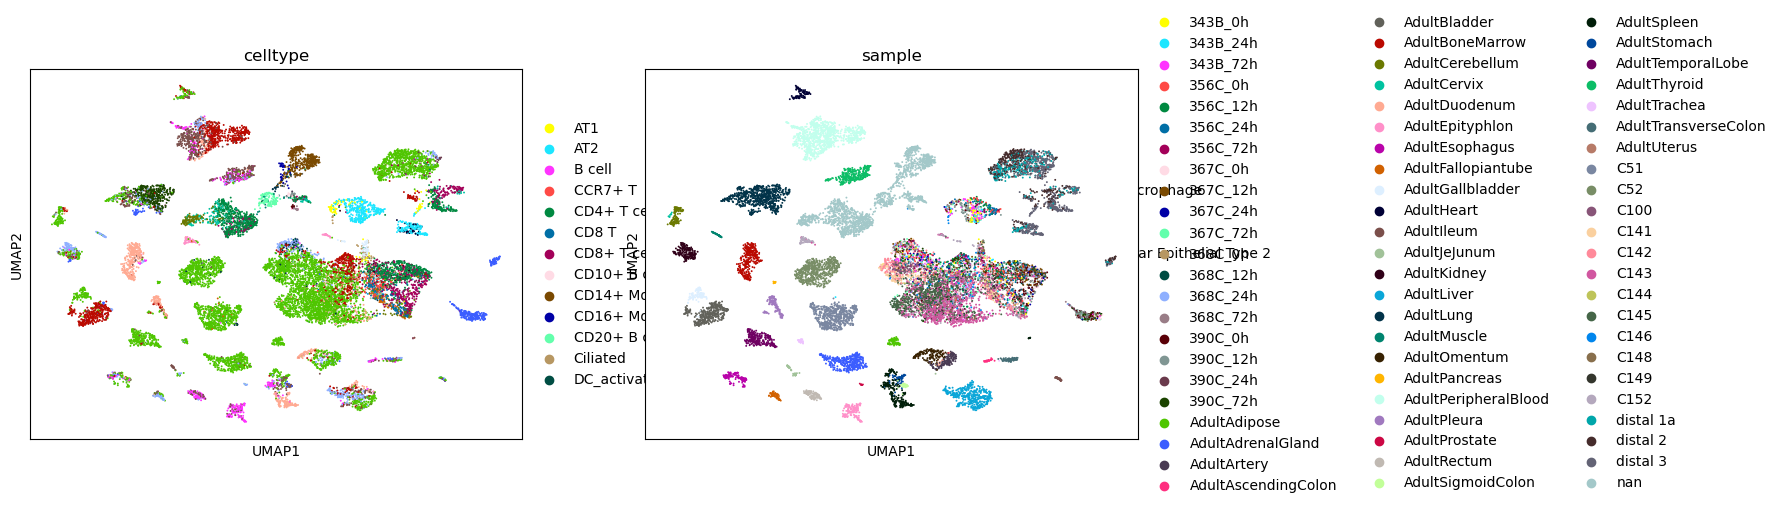

In [46]:
sc.pl.umap(adata_emb_tuned, color=['celltype','sample'])

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


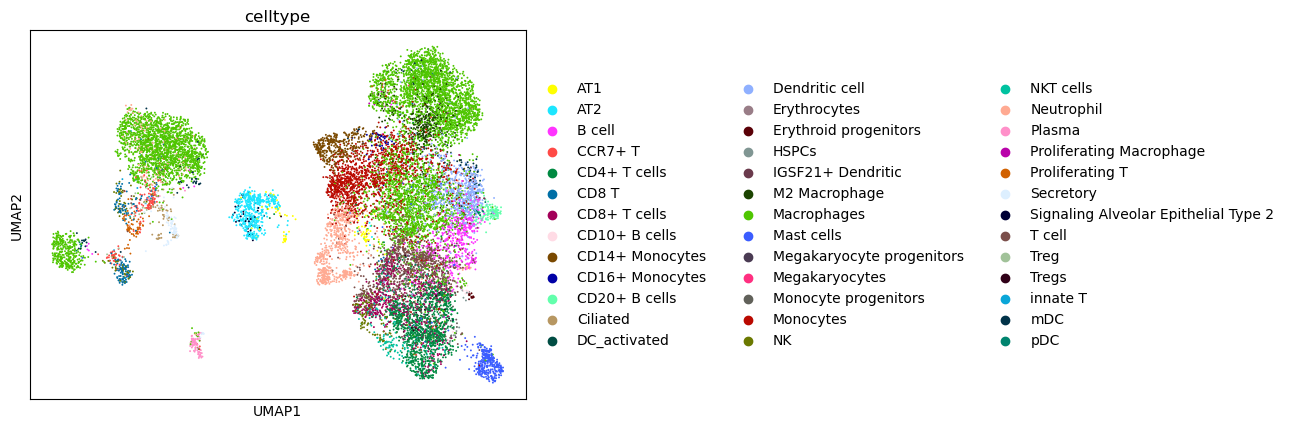

In [27]:
sc.pl.umap(adata_emb, color=['celltype'])

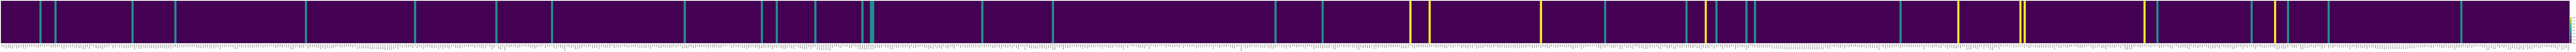

In [55]:
sc.pl.heatmap(adata[0], adata[0].var.index.tolist(), groupby= 'disease',show_gene_labels=True)

In [49]:
adata[0].var.index

Index(['HES4', 'ISG15', 'TNFRSF4', 'MXRA8', 'ATAD3A', 'PRDM16', 'UTS2',
       'TNFRSF9', 'ERRFI1', 'RBP7',
       ...
       'GKN2', 'DEFA5', 'UMOD', 'TRBV19', 'IGHV4-39', 'IGKJ1', 'IGKV1D-12',
       'IGKV1-27', 'APOA4', 'AC008268.1'],
      dtype='object', length=1200)

In [49]:
print(adata_emb_tuned.obs['cell_sentence'][0])

Top genes are CST3, COTL1, LGALS3, VIM, CCL3, CCL4L2, MGST1, SRGN, TYROBP, CTSS, GZMH, IL1B, TKT, HSP90AA1, RNF145, TMEM176B, SOX4, FBLN1, HLA-DRB1, HLA-DPA1, HLA-DPB1, ZFP36, DUSP1, LXN, NPC2, RUVBL2, LMNA, HCK, CRIP1, and HMGB2. sample of this cell is AdultBladder.


/tmp/ipykernel_1246933/2777450004.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(adata_emb_tuned.obs['cell_sentence'][0])


### Integration Test

In [50]:
adata_emb, adata_test_emb = lm_cell_integrated_embed(adata, test_adata, 
                                                     model_name="TrainingCELLama/output/interim_model",
                                                     top_k=20, use_intersect= True)

Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:177: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb = sc.AnnData(emb_res)
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:181: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb_new = sc.AnnData(emb_res_new)


In [51]:
adata_all =sc.concat(
    [adata_emb, adata_test_emb],
    join='outer', label ='Batch',
)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [52]:
sc.tl.pca(adata_all, svd_solver='arpack')
sc.pp.neighbors(adata_all, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_all)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map)

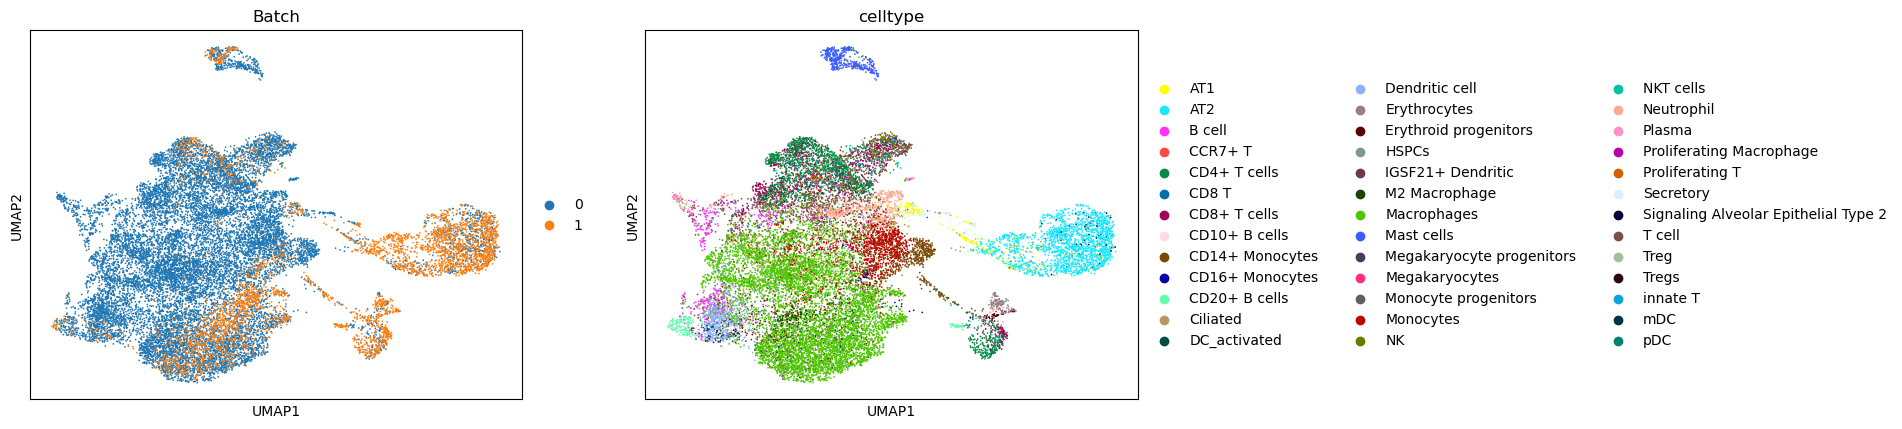

In [53]:
sc.pl.umap(adata_all, color=['Batch', 'celltype'])

### Cell labeling - kNN and Neural Network-based

In [47]:
adata_test_label = lm_cell_reference_celltyping(adata, test_adata, top_k=16, use_intersect= True, 
                                                model_name='TrainingCELLama/output/interim_model',
                                           ref_cell = 'celltype', new_name='cell_type_LM',obs_features = ['condition'])

Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]


In [48]:
#kNN-based
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
res_dict = {
    "accuracy": accuracy_score(adata_test_label.obs['celltype'], adata_test_label.obs['cell_type_LM']),
    "precision": precision_score(adata_test_label.obs['celltype'], adata_test_label.obs['cell_type_LM'], average="macro"),
    "recall": recall_score(adata_test_label.obs['celltype'], adata_test_label.obs['cell_type_LM'], average="macro"),
    "macro_f1": f1_score(adata_test_label.obs['celltype'], adata_test_label.obs['cell_type_LM'], average="macro"),
}

print(res_dict)

{'accuracy': 0.7581813639770172, 'precision': 0.3667191214723791, 'recall': 0.3426817825637041, 'macro_f1': 0.32627164757204147}


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
adata_test_label_xgb= lm_cell_reference_celltyping_xgb(adata, test_adata, top_k=16, use_intersect= True, model_name='all-MiniLM-L12-v2',
                                                        ref_cell = 'celltype', new_name='cell_type_LM',obs_features = ['sample','condition'])

Language Model Cell Embedding Is Implemented


In [17]:
res_dict_xgb = {
    "accuracy": accuracy_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM']),
    "precision": precision_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM'], average="macro"),
    "recall": recall_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM'], average="macro"),
    "macro_f1": f1_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM'], average="macro"),
}

print(res_dict_xgb)

{'accuracy': 0.8658506120409692, 'precision': 0.48891973745488193, 'recall': 0.47898434680023433, 'macro_f1': 0.4684573972999543}


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
### Grid Search
from tqdm import tqdm
from itertools import product

def grid_search(adata, test_adata):
    # Define the parameter grid
    param_grid = {
        'top_k': np.linspace(10,30, 11, dtype=int),  # 10 values from 20 to 200
        'model_name': ['all-MiniLM-L12-v2'],
        'obs_features': [['sample'],['condition'],['sample','condition'], None]
    }

    # Create a product of all parameter combinations
    all_combinations = list(product(param_grid['top_k'], param_grid['model_name'], param_grid['obs_features']))
    
    results = []

    # Use tqdm to show progress
    for top_k, model_name, obs_features in tqdm(all_combinations, desc='Grid Search Progress', unit='combination'):
        try:
            # Run the cell typing function
            adata_test_label_xgb = lm_cell_reference_celltyping(
                adata, test_adata,
                top_k=top_k,
                use_intersect=True,
                model_name=model_name,
                ref_cell='celltype',
                new_name='cell_type_LM',
                obs_features=obs_features
            )

            # Calculate metrics
            metrics = {
                "accuracy": accuracy_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM']),
                "precision": precision_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM'], average="macro"),
                "recall": recall_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM'], average="macro"),
                "macro_f1": f1_score(adata_test_label_xgb.obs['celltype'], adata_test_label_xgb.obs['cell_type_LM'], average="macro"),
            }
            
            # Store results
            results.append({
                'top_k': top_k,
                'model_name': model_name,
                'obs_features': ','.join(obs_features) if obs_features else 'None',
                'metrics': metrics
            })
            
            print('RESULTS',{
                'top_k': top_k,
                'model_name': model_name,
                'obs_features': ','.join(obs_features) if obs_features else 'None',
                'metrics': metrics
            })

        except Exception as e:
            print(f"Error with parameters top_k={top_k}, model_name={model_name}, obs_features={obs_features}: {str(e)}")

    return results

results = grid_search(adata, test_adata)

Grid Search Progress:   0%|                                                             | 0/44 [00:00<?, ?combination/s]

Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:   2%|█▏                                                   | 1/44 [00:11<08:31, 11.90s/combination]

RESULTS {'top_k': 10, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8368723457406945, 'precision': 0.40290268033999743, 'recall': 0.37329616661168447, 'macro_f1': 0.36226096087987314}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:   5%|██▍                                                  | 2/44 [00:23<08:17, 11.85s/combination]

RESULTS {'top_k': 10, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.7729203097676742, 'precision': 0.4042545601888199, 'recall': 0.3967980062191835, 'macro_f1': 0.3694440266747965}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:   7%|███▌                                                 | 3/44 [00:37<08:34, 12.54s/combination]

RESULTS {'top_k': 10, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8343742193354984, 'precision': 0.4257312193070236, 'recall': 0.40648305003691465, 'macro_f1': 0.39540046071213353}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:   9%|████▊                                                | 4/44 [00:47<07:51, 11.80s/combination]

RESULTS {'top_k': 10, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.7816637521858606, 'precision': 0.3776889523747711, 'recall': 0.35949389925977454, 'macro_f1': 0.33898751821719897}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  11%|██████                                               | 5/44 [01:01<08:04, 12.43s/combination]

RESULTS {'top_k': 12, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8396202847864102, 'precision': 0.4640735346673745, 'recall': 0.4272652579816838, 'macro_f1': 0.40912652441253056}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  14%|███████▏                                             | 6/44 [01:14<08:00, 12.64s/combination]

RESULTS {'top_k': 12, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.7771671246565076, 'precision': 0.4324986253728913, 'recall': 0.4018901658355699, 'macro_f1': 0.39165471620174147}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  16%|████████▍                                            | 7/44 [01:29<08:13, 13.34s/combination]

RESULTS {'top_k': 12, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8363727204596553, 'precision': 0.45610185899317396, 'recall': 0.434386290697828, 'macro_f1': 0.4166736229416803}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  18%|█████████▋                                           | 8/44 [01:40<07:40, 12.79s/combination]

RESULTS {'top_k': 12, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.7864101923557332, 'precision': 0.3963810428654138, 'recall': 0.37378863620624864, 'macro_f1': 0.3610289795014342}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  20%|██████████▊                                          | 9/44 [01:55<07:47, 13.37s/combination]

RESULTS {'top_k': 14, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8388708468648514, 'precision': 0.44560710896582306, 'recall': 0.43579408421721694, 'macro_f1': 0.4079565622130565}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  23%|███████████▊                                        | 10/44 [02:09<07:46, 13.73s/combination]

RESULTS {'top_k': 14, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.792905321009243, 'precision': 0.4414012552078563, 'recall': 0.4413644019920065, 'macro_f1': 0.4071239028720373}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  25%|█████████████                                       | 11/44 [02:25<07:54, 14.37s/combination]

RESULTS {'top_k': 14, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8431176617536847, 'precision': 0.5119129518047661, 'recall': 0.5071575163548528, 'macro_f1': 0.47811316892857536}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  27%|██████████████▏                                     | 12/44 [02:38<07:27, 13.98s/combination]

RESULTS {'top_k': 14, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.796152885335998, 'precision': 0.38880603412578313, 'recall': 0.3969725766086281, 'macro_f1': 0.35865001501356664}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  30%|███████████████▎                                    | 13/44 [02:54<07:32, 14.58s/combination]

RESULTS {'top_k': 16, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8548588558581064, 'precision': 0.4991627112627575, 'recall': 0.4510067518273336, 'macro_f1': 0.43567197535845814}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  32%|████████████████▌                                   | 14/44 [03:10<07:26, 14.87s/combination]

RESULTS {'top_k': 16, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.7966525106170372, 'precision': 0.4308807783390242, 'recall': 0.4213760587043187, 'macro_f1': 0.4052860863124742}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  34%|█████████████████▋                                  | 15/44 [03:27<07:33, 15.64s/combination]

RESULTS {'top_k': 16, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8648513614788909, 'precision': 0.5634061920886174, 'recall': 0.5440311749579086, 'macro_f1': 0.5292018554296224}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  36%|██████████████████▉                                 | 16/44 [03:42<07:06, 15.24s/combination]

RESULTS {'top_k': 16, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.805146140394704, 'precision': 0.38818279063204, 'recall': 0.39014445101364625, 'macro_f1': 0.3664047452507145}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  39%|████████████████████                                | 17/44 [03:59<07:07, 15.82s/combination]

RESULTS {'top_k': 18, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8533599800149888, 'precision': 0.48889190296269264, 'recall': 0.43732993502530176, 'macro_f1': 0.4219440227657006}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  41%|█████████████████████▎                              | 18/44 [04:16<07:01, 16.21s/combination]

RESULTS {'top_k': 18, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8103922058456158, 'precision': 0.5051832409687412, 'recall': 0.4661396130210187, 'macro_f1': 0.4494673868040183}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  43%|██████████████████████▍                             | 19/44 [04:34<07:02, 16.89s/combination]

RESULTS {'top_k': 18, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8593554833874594, 'precision': 0.5155248860072479, 'recall': 0.4691009360469593, 'macro_f1': 0.457810122140855}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  45%|███████████████████████▋                            | 20/44 [04:50<06:36, 16.52s/combination]

RESULTS {'top_k': 18, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.8193854609043217, 'precision': 0.4555431013604053, 'recall': 0.4451759873051405, 'macro_f1': 0.41975685405198193}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  48%|████████████████████████▊                           | 21/44 [05:08<06:32, 17.07s/combination]

RESULTS {'top_k': 20, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8486135398451161, 'precision': 0.4556318098713424, 'recall': 0.4339016639161049, 'macro_f1': 0.41704403948936813}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  50%|██████████████████████████                          | 22/44 [05:26<06:22, 17.39s/combination]

RESULTS {'top_k': 20, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8151386460154884, 'precision': 0.4912516741455476, 'recall': 0.5300864085836916, 'macro_f1': 0.46872562096431375}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  52%|███████████████████████████▏                        | 23/44 [05:46<06:20, 18.11s/combination]

RESULTS {'top_k': 20, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8593554833874594, 'precision': 0.5428797799179483, 'recall': 0.5235246861718489, 'macro_f1': 0.5026015131998305}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  55%|████████████████████████████▎                       | 24/44 [06:03<05:54, 17.73s/combination]

RESULTS {'top_k': 20, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.825630776917312, 'precision': 0.4595940277656052, 'recall': 0.4630229442645538, 'macro_f1': 0.4151694787682857}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  57%|█████████████████████████████▌                      | 25/44 [06:23<05:48, 18.34s/combination]

RESULTS {'top_k': 22, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8608543592305771, 'precision': 0.5034167793924184, 'recall': 0.4928784661329402, 'macro_f1': 0.4723710417485801}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  59%|██████████████████████████████▋                     | 26/44 [06:42<05:35, 18.61s/combination]

RESULTS {'top_k': 22, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8306270297277042, 'precision': 0.48607406495368033, 'recall': 0.5031149221413243, 'macro_f1': 0.4563819421836956}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  61%|███████████████████████████████▉                    | 27/44 [07:03<05:27, 19.25s/combination]

RESULTS {'top_k': 22, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.867349487884087, 'precision': 0.5164245280465188, 'recall': 0.523751500507449, 'macro_f1': 0.5017809660531439}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  64%|█████████████████████████████████                   | 28/44 [07:21<05:03, 18.97s/combination]

RESULTS {'top_k': 22, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.8348738446165376, 'precision': 0.48407704037406724, 'recall': 0.47315407664347675, 'macro_f1': 0.43408332491858137}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  66%|██████████████████████████████████▎                 | 29/44 [07:42<04:51, 19.45s/combination]

RESULTS {'top_k': 24, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8593554833874594, 'precision': 0.49717917543925366, 'recall': 0.46139907184483947, 'macro_f1': 0.443364348887684}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  68%|███████████████████████████████████▍                | 30/44 [08:02<04:37, 19.81s/combination]

RESULTS {'top_k': 24, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8273794654009493, 'precision': 0.47772685279869187, 'recall': 0.4547040942322779, 'macro_f1': 0.43096742118403575}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  70%|████████████████████████████████████▋               | 31/44 [08:24<04:23, 20.29s/combination]

RESULTS {'top_k': 24, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8648513614788909, 'precision': 0.5058949407293959, 'recall': 0.48311863103056063, 'macro_f1': 0.4654890999646146}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  73%|█████████████████████████████████████▊              | 32/44 [08:43<03:59, 19.97s/combination]

RESULTS {'top_k': 24, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.839120659505371, 'precision': 0.4603594282440806, 'recall': 0.4361312485550377, 'macro_f1': 0.4133039563539422}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  75%|███████████████████████████████████████             | 33/44 [09:05<03:44, 20.43s/combination]

RESULTS {'top_k': 26, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8613539845116163, 'precision': 0.473249301568234, 'recall': 0.43258975316416115, 'macro_f1': 0.42500645901165746}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  77%|████████████████████████████████████████▏           | 34/44 [09:26<03:26, 20.68s/combination]

RESULTS {'top_k': 26, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8251311516362728, 'precision': 0.4891463965293177, 'recall': 0.44185041814553344, 'macro_f1': 0.4160133909292595}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  80%|█████████████████████████████████████████▎          | 35/44 [09:47<03:08, 20.97s/combination]

RESULTS {'top_k': 26, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8616037971521359, 'precision': 0.48039723826425024, 'recall': 0.44332996357743154, 'macro_f1': 0.43136959110978523}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  82%|██████████████████████████████████████████▌         | 36/44 [10:08<02:46, 20.84s/combination]

RESULTS {'top_k': 26, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.8383712215838122, 'precision': 0.4365211166591895, 'recall': 0.42532480656987803, 'macro_f1': 0.3995696991756867}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  84%|███████████████████████████████████████████▋        | 37/44 [10:30<02:27, 21.05s/combination]

RESULTS {'top_k': 28, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8401199100674495, 'precision': 0.42019771428581193, 'recall': 0.39171604154095907, 'macro_f1': 0.3779349830735561}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  86%|████████████████████████████████████████████▉       | 38/44 [10:51<02:07, 21.26s/combination]

RESULTS {'top_k': 28, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8066450162378216, 'precision': 0.40554177046962525, 'recall': 0.378384691871514, 'macro_f1': 0.35493251750320315}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  89%|██████████████████████████████████████████████      | 39/44 [11:13<01:47, 21.40s/combination]

RESULTS {'top_k': 28, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8246315263552336, 'precision': 0.41721767742828975, 'recall': 0.37923176182001195, 'macro_f1': 0.36356690408547765}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  91%|███████████████████████████████████████████████▎    | 40/44 [11:34<01:25, 21.32s/combination]

RESULTS {'top_k': 28, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.8263802148388708, 'precision': 0.408824353598826, 'recall': 0.40383403501907195, 'macro_f1': 0.3806519170642694}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  93%|████████████████████████████████████████████████▍   | 41/44 [11:56<01:04, 21.46s/combination]

RESULTS {'top_k': 30, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample', 'metrics': {'accuracy': 0.8146390207344492, 'precision': 0.36431073226977917, 'recall': 0.3693324361787394, 'macro_f1': 0.3394402221010336}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  95%|█████████████████████████████████████████████████▋  | 42/44 [12:17<00:42, 21.49s/combination]

RESULTS {'top_k': 30, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'condition', 'metrics': {'accuracy': 0.8128903322508119, 'precision': 0.35238619319643405, 'recall': 0.36488003904888644, 'macro_f1': 0.33051873109306845}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress:  98%|██████████████████████████████████████████████████▊ | 43/44 [12:40<00:21, 21.66s/combination]

RESULTS {'top_k': 30, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'sample,condition', 'metrics': {'accuracy': 0.8146390207344492, 'precision': 0.3686803305390675, 'recall': 0.3723320952347422, 'macro_f1': 0.3431836911001491}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progress: 100%|████████████████████████████████████████████████████| 44/44 [13:01<00:00, 17.76s/combination]

RESULTS {'top_k': 30, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.8288783412440669, 'precision': 0.3879619343162783, 'recall': 0.38689350462213445, 'macro_f1': 0.362499366366948}}


In [22]:
df_results = pd.DataFrame(results)

df_results['accuracy'] = df_results['metrics'].apply(lambda x: x['accuracy'])
df_results['precision'] = df_results['metrics'].apply(lambda x: x['precision'])
df_results['recall'] = df_results['metrics'].apply(lambda x: x['recall'])
df_results['macro_f1'] = df_results['metrics'].apply(lambda x: x['macro_f1'])


In [23]:
df_results

,top_k,model_name,obs_features,metrics,accuracy,precision,recall,macro_f1
0,10,all-MiniLM-L12-v2,sample,"{'accuracy': 0.8368723457406945, 'precision': ...",0.836872,0.402903,0.373296,0.362261
1,10,all-MiniLM-L12-v2,condition,"{'accuracy': 0.7729203097676742, 'precision': ...",0.772920,0.404255,0.396798,0.369444
2,10,all-MiniLM-L12-v2,"sample,condition","{'accuracy': 0.8343742193354984, 'precision': ...",0.834374,0.425731,0.406483,0.395400
3,10,all-MiniLM-L12-v2,None,"{'accuracy': 0.7816637521858606, 'precision': ...",0.781664,0.377689,0.359494,0.338988
4,12,all-MiniLM-L12-v2,sample,"{'accuracy': 0.8396202847864102, 'precision': ...",0.839620,0.464074,0.427265,0.409127
5,12,all-MiniLM-L12-v2,condition,"{'accuracy': 0.7771671246565076, 'precision': ...",0.777167,0.432499,0.401890,0.391655
6,12,all-MiniLM-L12-v2,"sample,condition","{'accuracy': 0.8363727204596553, 'precision': ...",0.836373,0.456102,0.434386,0.416674
7,12,all-MiniLM-L12-v2,None,"{'accuracy': 0.7864101923557332, 'precision': ...",0.786410,0.396381,0.373789,0.361029
8,14,all-MiniLM-L12-v2,sample,"{'accuracy': 0.8388708468648514, 'precision': ...",0.838871,0.445607,0.435794,0.407957
9,14,all-MiniLM-L12-v2,condition,"{'accuracy': 0.792905321009243, 'precision': 0...",0.792905,0.441401,0.441364,0.407124


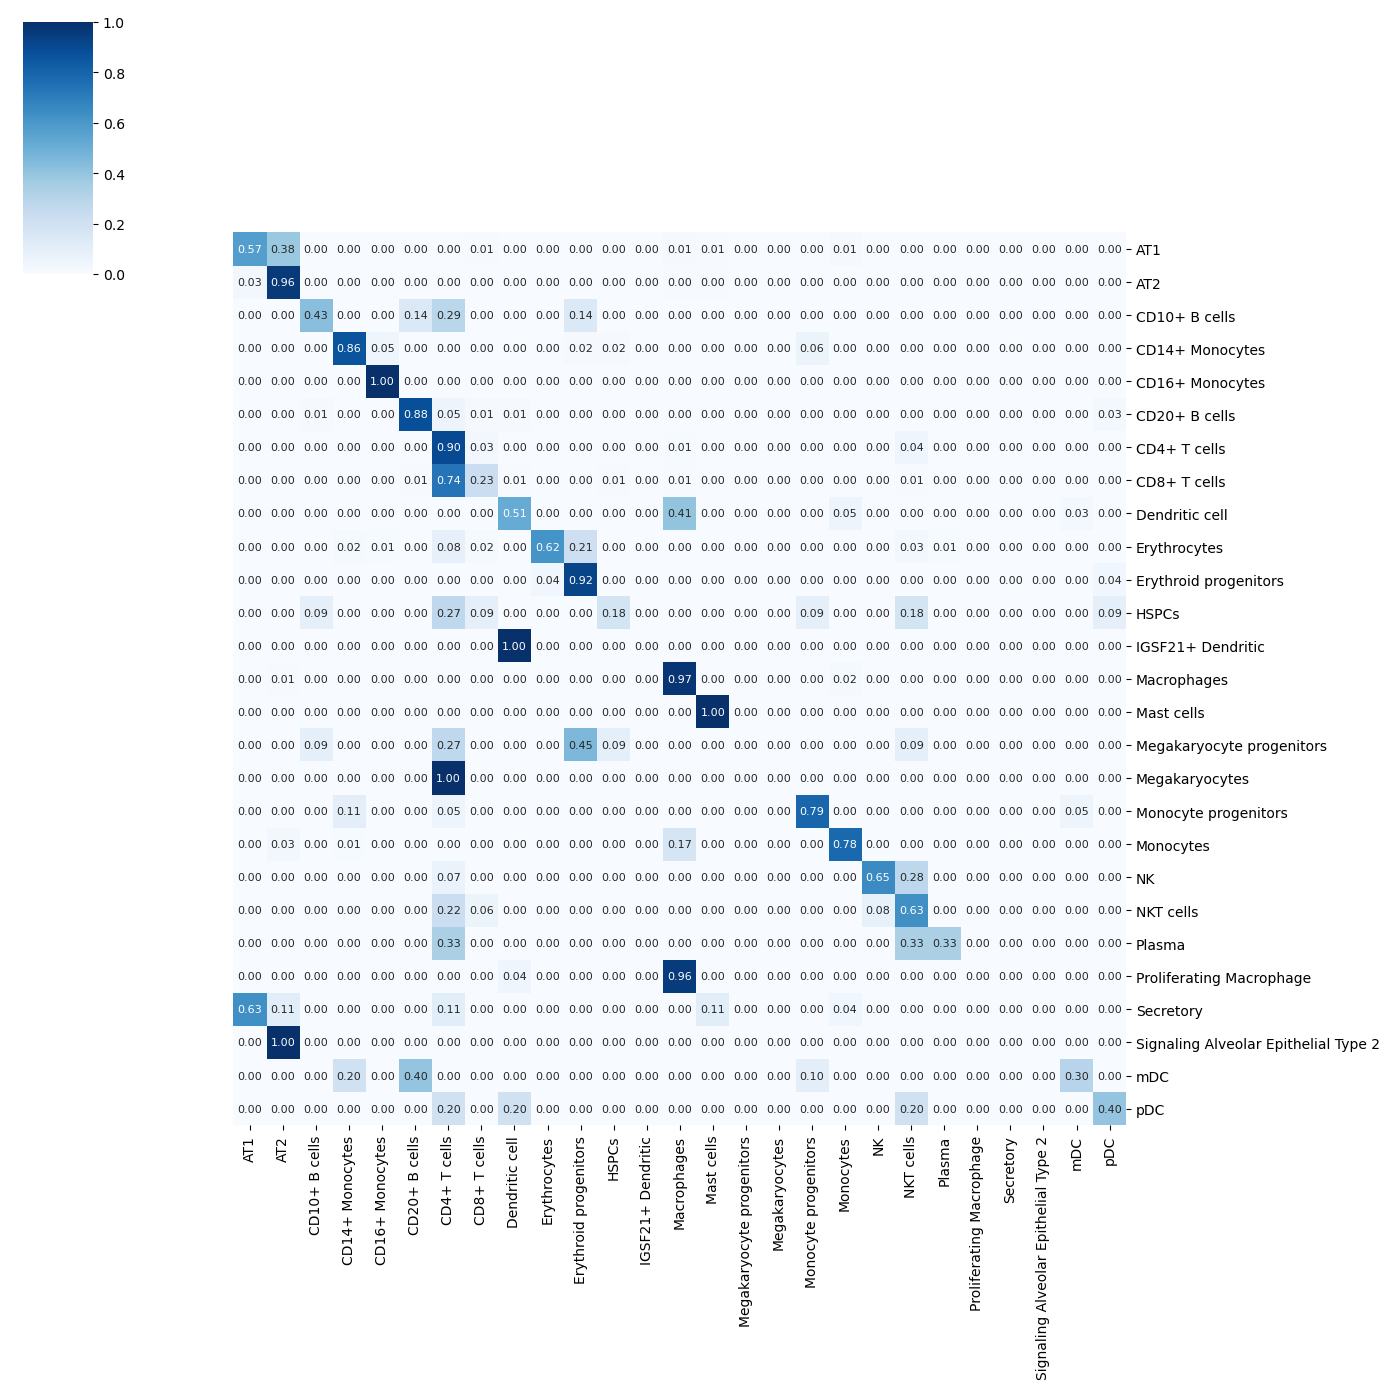

In [21]:
from sklearn.metrics import confusion_matrix

y_true = adata_test_label_xgb.obs['celltype']
y_pred = adata_test_label_xgb.obs['cell_type_LM']
cell_type_list = np.unique(y_true)
matrix = confusion_matrix(y_true, y_pred, labels=cell_type_list)
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

df = pd.DataFrame(matrix, index=cell_type_list[:matrix.shape[0]], columns=cell_type_list[:matrix.shape[1]])
ax = sns.clustermap(df,  
                    cmap='Blues',
                    annot=True ,fmt=".2f", 
                    annot_kws={'size': 8}, 
                    vmin=0, 
                    vmax=1,
                    row_cluster=False, 
                    col_cluster=False, 
                    figsize=(14, 14))

##### cf>scGPT results
{'accuracy': 0.8668498626030477,
 'precision': 0.5449474091628096,
 'recall': 0.49698960480359766,
 'macro_f1': 0.483531805052145}

/tmp/ipykernel_1166257/3969727792.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_none = df_none.append(zeroshot_results, ignore_index=True)


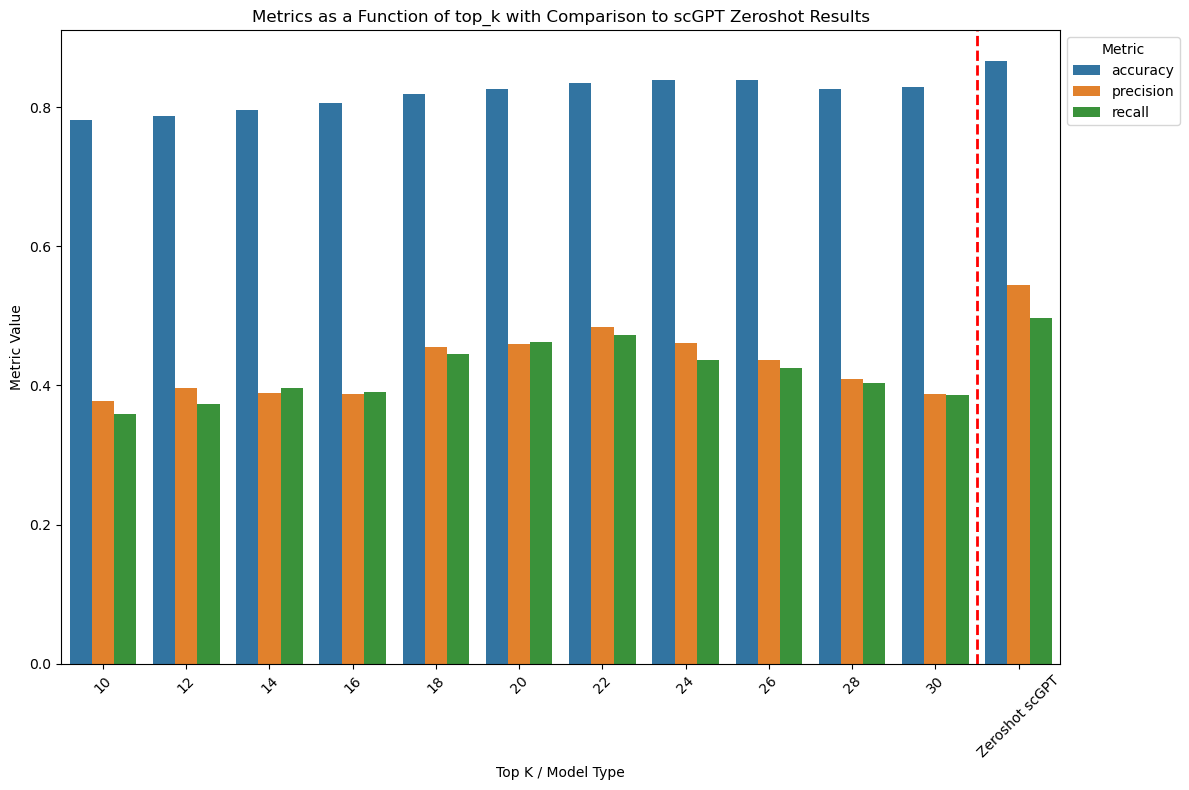

In [35]:
df_none = df_results[df_results['obs_features'] == 'None']
zeroshot_results = {
    "top_k": "Zeroshot scGPT",  # Unique identifier
    "model_name": "none",
    "obs_features": "None",
    "accuracy": 0.8668498626030477,
    "precision": 0.5449474091628096,
    "recall": 0.49698960480359766,
    "macro_f1": 0.483531805052145
}

df_none = df_none.append(zeroshot_results, ignore_index=True)


# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df_none.melt(id_vars=['top_k'], value_vars=['accuracy', 'precision', 'recall'],
                         var_name='Metric', value_name='Value')

# Create a barplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
barplot = sns.barplot(x='top_k', y='Value', hue='Metric', data=df_melted, palette="tab10")

# Highlight the scGPT zeroshot results
# Find the index for scGPT results to draw a vertical line
scgpt_index = df_melted.index[df_melted['top_k'] == 'Zeroshot scGPT'].tolist()[0]
plt.axvline(x=scgpt_index - 0.5, color='red', linestyle='--', linewidth=2)  # Adjusting x position for aesthetics

plt.title('Metrics as a Function of top_k with Comparison to scGPT Zeroshot Results')
plt.xlabel('Top K / Model Type')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to make room for legend and x-axis labels
plt.show()

/tmp/ipykernel_1166257/766232162.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_obs = df_obs.append(zeroshot_results, ignore_index=True)


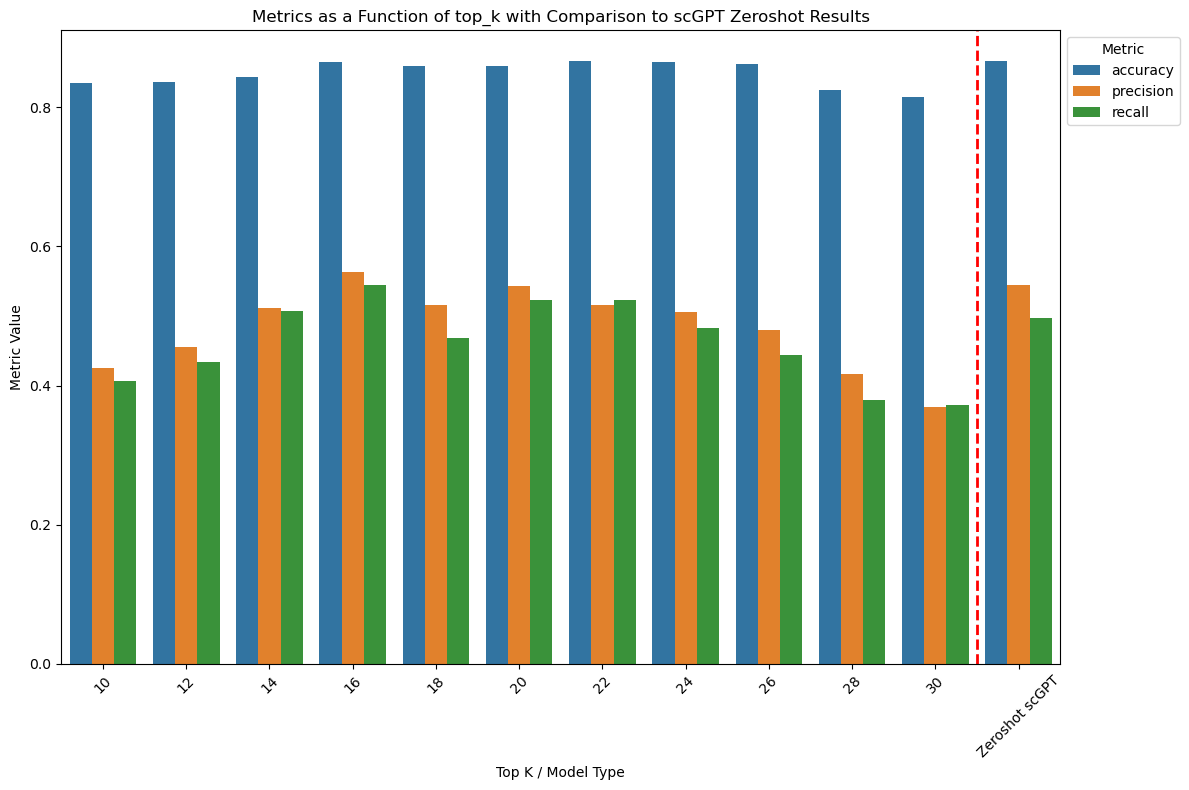

In [36]:
df_obs = df_results[df_results['obs_features'] == 'sample,condition']
zeroshot_results = {
    "top_k": "Zeroshot scGPT",  # Unique identifier
    "model_name": "none",
    "obs_features": "sample,condition",
    "accuracy": 0.8668498626030477,
    "precision": 0.5449474091628096,
    "recall": 0.49698960480359766,
    "macro_f1": 0.483531805052145
}

df_obs = df_obs.append(zeroshot_results, ignore_index=True)


# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df_obs.melt(id_vars=['top_k'], value_vars=['accuracy', 'precision', 'recall'],
                         var_name='Metric', value_name='Value')

# Create a barplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
barplot = sns.barplot(x='top_k', y='Value', hue='Metric', data=df_melted, palette="tab10")

# Highlight the scGPT zeroshot results
# Find the index for scGPT results to draw a vertical line
scgpt_index = df_melted.index[df_melted['top_k'] == 'Zeroshot scGPT'].tolist()[0]
plt.axvline(x=scgpt_index - 0.5, color='red', linestyle='--', linewidth=2)  # Adjusting x position for aesthetics

plt.title('Metrics as a Function of top_k with Comparison to scGPT Zeroshot Results')
plt.xlabel('Top K / Model Type')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to make room for legend and x-axis labels
plt.show()